In [1]:
!wget https://raw.githubusercontent.com/bigmlcom/python/master/data/spam.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import pandas as pd
df = pd.read_csv('spam.csv' , encoding = 'utf-8' , sep = "\t")
df.head()

,Type,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.shape

(656, 2)

In [4]:
round(df['Type'].value_counts(normalize = True)*100,2)

Type
ham     87.96
spam    12.04
Name: proportion, dtype: float64

In [5]:
df["length"] = df["Message"].apply(len)

In [6]:
df.head()

,Type,Message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


### Data Visulization

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<Axes: ylabel='Frequency'>

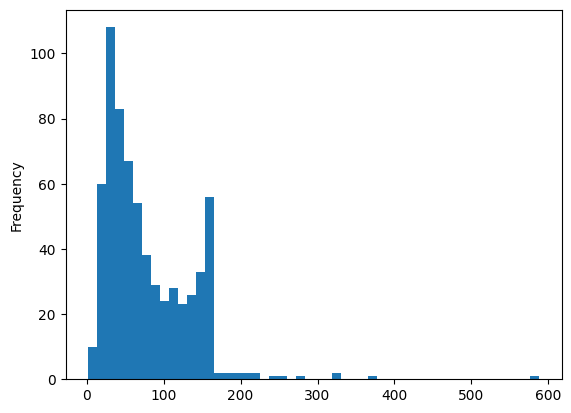

In [8]:
# df['length'].plot.hist(bins = 50)
df['length'].plot(kind = 'hist' , bins = 50)

In [9]:
df['Type'].unique()

array(['ham', 'spam'], dtype=object)

<Axes: ylabel='Frequency'>

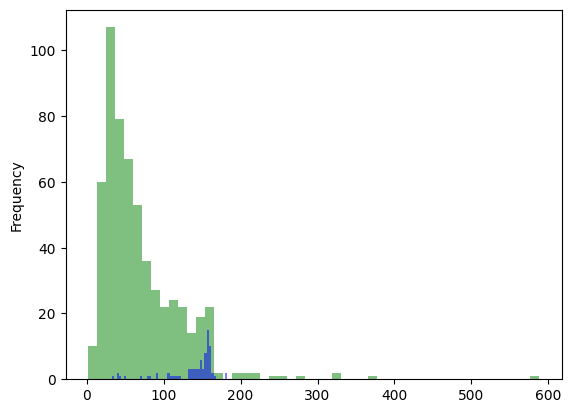

In [10]:
df[df['Type']== 'ham']['length'].plot(kind = 'hist' , bins = 50 , alpha = 0.5 , color = 'green' , label = 'ham messages')
df[df['Type']== 'spam']['length'].plot(kind = 'hist' , bins = 50 , alpha = 0.5 , color = 'blue' , label = 'spam messages')

In [11]:
for messages in df['Message']:
  print(messages)

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Ok lar... Joking wif u oni...
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
U dun say so early hor... U c already then say...
Nah I don't think he goes to usf, he lives around here though
FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv
Even my brother is not like to speak with me. They treat me like aids patent.
As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.
Had your mobile 11 months or more? U R entitl

Problems in message col:

 - Not a fix format
 - Spelling problems  - Because spelling problem , we need advanced models e.g. Glove , Elmo , BERT , Roberta , Good amount of dictionary, Spelling correction models.
 - Special characters
 - Upper case issues

In [12]:
import string
mess = "This is sample messaging!@.."

In [13]:
mess

'This is sample messaging!@..'

In [14]:
nonpunc = ''.join([char for char in mess if char not in string.punctuation])

In [15]:
nonpunc

'This is sample messaging'

In [16]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\eunic\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [18]:
clean_mess = [word for word in nonpunc.split() if word.lower() not in stopwords.words('english')]

In [19]:
clean_mess

['sample', 'messaging']

In [20]:
# Text Process
def text_preprocess(mess):
  nonpunc = ''.join([char for char in mess if char not in string.punctuation])
  clean_mess = [word for word in nonpunc.split() if word.lower() not in stopwords.words('english')]
  return clean_mess

In [21]:
df['word_processed'] = df['Message'].apply(text_preprocess)

In [22]:
df['word_processed']

0      [Go, jurong, point, crazy, Available, bugis, n...
1                         [Ok, lar, Joking, wif, u, oni]
2      [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3          [U, dun, say, early, hor, U, c, already, say]
4      [Nah, dont, think, goes, usf, lives, around, t...
                             ...                        
651                        [Anything, lor, Juz, us, lor]
652    [Get, dump, heap, mom, decided, come, lowes, B...
653    [Ok, lor, Sony, ericsson, salesman, ask, shuhu...
654                             [Ard, 6, like, dat, lor]
655        [dont, wait, til, least, wednesday, see, get]
Name: word_processed, Length: 656, dtype: object

In [23]:
df.head()

,Type,Message,length,word_processed
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[Go, jurong, point, crazy, Available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,29,"[Ok, lar, Joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, 2, wkly, comp, win, FA, Cup, fin..."
3,ham,U dun say so early hor... U c already then say...,49,"[U, dun, say, early, hor, U, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, dont, think, goes, usf, lives, around, t..."


<Axes: xlabel='word_processed'>

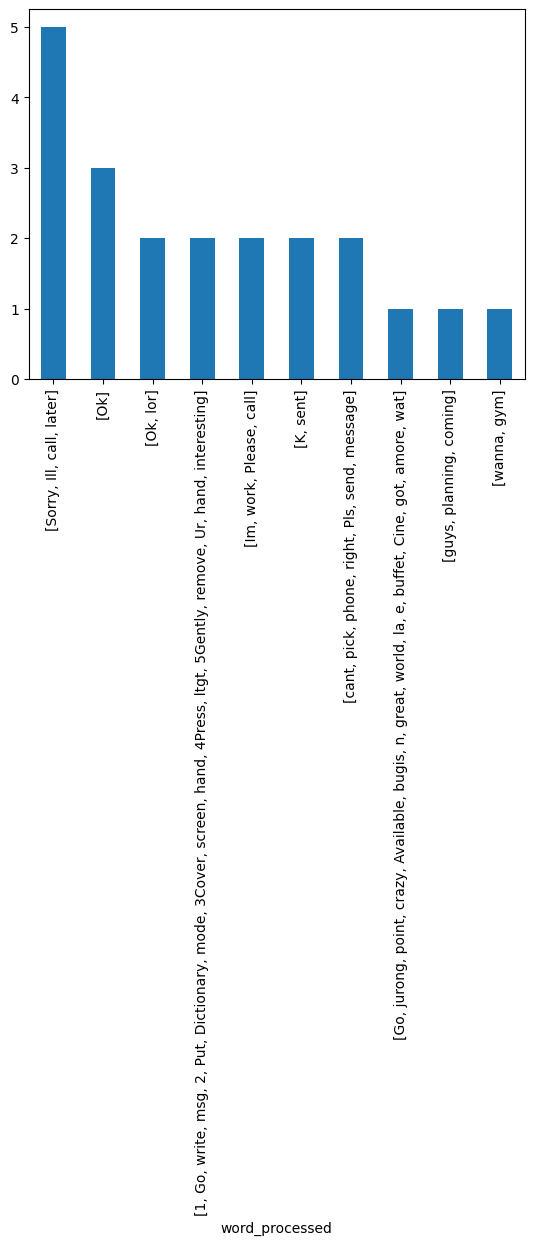

In [24]:
df['word_processed'].value_counts()[:10].plot(kind = 'bar')

In [25]:
#How to find most common words in SPAM messages
df[df['Type']=='spam']['word_processed'].value_counts()[:10]

word_processed
[Free, entry, 2, wkly, comp, win, FA, Cup, final, tkts, 21st, May, 2005, Text, FA, 87121, receive, entry, questionstd, txt, rateTCs, apply, 08452810075over18s]                 1
[Sorry, missed, call, lets, talk, time, Im, 07090201529]                                                                                                                        1
[current, leading, bid, 151, pause, auction, send, Customer, Care, 08718726270]                                                                                                 1
[datingi, two, started, sent, text, talk, sport, radio, last, week, connection, think, coincidence]                                                                             1
[IMPORTANT, MESSAGE, final, contact, attempt, important, messages, waiting, customer, claims, dept, Expires, 13404, Call, 08717507382]                                          1
[£400, XMAS, REWARD, WAITING, computer, randomly, picked, loyal, mobile, customers, receive, £4

In [26]:
df[df['Type']=='ham']['word_processed'].value_counts()[:10]

word_processed
[Sorry, Ill, call, later]                                                                                                    5
[Ok]                                                                                                                         3
[cant, pick, phone, right, Pls, send, message]                                                                               2
[Im, work, Please, call]                                                                                                     2
[1, Go, write, msg, 2, Put, Dictionary, mode, 3Cover, screen, hand, 4Press, ltgt, 5Gently, remove, Ur, hand, interesting]    2
[K, sent]                                                                                                                    2
[Ok, lor]                                                                                                                    2
[Sounds, better, evening, im, costume, Im, sure, time, finish, tomorrow, txt, end]              

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
bow_transformer = CountVectorizer(analyzer = text_preprocess).fit(df['Message'])

In [29]:
len(bow_transformer.vocabulary_)

2874

In [30]:
df_03 = df['Message'][3]

In [31]:
df_03

'U dun say so early hor... U c already then say...'

In [32]:
bow_03 = bow_transformer.transform([df_03])
print(df_03)
print("============")
print(bow_03)
print("===============")
print(bow_03.shape)

U dun say so early hor... U c already then say...
  (0, 873)	2
  (0, 1006)	1
  (0, 1178)	1
  (0, 1428)	1
  (0, 1434)	1
  (0, 1687)	1
  (0, 2320)	2
(1, 2874)


In [33]:
print(df_03)
print("============")
print(bow_transformer.get_feature_names_out()[873])
print("============")
print(bow_transformer.get_feature_names_out()[2320])

U dun say so early hor... U c already then say...
U
say


In [34]:
df_bow = bow_transformer.transform(df['Message'])

In [35]:
df_bow.shape

(656, 2874)

In [36]:
print(df_bow.nnz)

5773


In [37]:
sparsity = round((100.0*df_bow.nnz/(df_bow.shape[0]*df_bow.shape[1])),3)

In [38]:
from sklearn.feature_extraction.text import TfidfTransformer

In [39]:
tfidf_transformer = TfidfTransformer().fit(df_bow)

In [40]:
tfidf_03 = tfidf_transformer.transform(bow_03)

In [41]:
print(tfidf_03)

  (0, 2320)	0.5580323071093075
  (0, 1687)	0.36562186391145446
  (0, 1434)	0.32832281466548635
  (0, 1428)	0.3163152028006219
  (0, 1178)	0.2910237654195182
  (0, 1006)	0.2738874028508108
  (0, 873)	0.43285133385516383


In [42]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['U']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['say']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['already']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['early']])

4.021948115684884
5.185098925490565
5.08978874568624
6.10138965736472


In [43]:
df_tfidf = tfidf_transformer.transform(df_bow)

In [44]:
print(df_tfidf.shape)

(656, 2874)


### TRain the model

In [45]:
from sklearn.naive_bayes import MultinomialNB

In [46]:
spam_detect_model = MultinomialNB().fit(df_tfidf , df['Type'])

In [47]:
print("predicted-" , spam_detect_model.predict(tfidf_03)[0])
print("actual-" , df.Type[3])

predicted- ham
actual- ham


In [48]:
all_predictions = spam_detect_model.predict(df_tfidf)

In [49]:
all_predictions

array(['ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam',
       'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham',
       'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam',
       'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       

In [50]:
from sklearn.model_selection import train_test_split

sms_train , sms_test , label_train , label_test = train_test_split(df['Message'] , df['Type'] , test_size = 0.4)

In [51]:
print("Shape of SMS Train Data" , sms_train.shape)
print("Shape of SMS Label Train Data" , label_train.shape)
print("Shape of SMS Test Data" , sms_test.shape)
print("Shape of SMS label test Data" , label_test.shape)


Shape of SMS Train Data (393,)
Shape of SMS Label Train Data (393,)
Shape of SMS Test Data (263,)
Shape of SMS label test Data (263,)


In [52]:
from sklearn.pipeline import Pipeline

In [53]:
pipeline = Pipeline([
    ('bow' , CountVectorizer(analyzer = text_preprocess)),
    ('tfidf' , TfidfTransformer()),
    ('classifier' , MultinomialNB())
])

In [54]:
pipeline.fit(sms_train , label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_preprocess at 0x0000014F72844680>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [55]:
predictions = pipeline.predict(sms_test)

In [56]:
next_text = ["During our last conversation we agreed to deliver goods" ,
             "you have been selected to receive 10000 cash prize"]

predictions_01 = pipeline.predict(next_text)
print(predictions_01)

['ham' 'ham']
